In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from Attacked_Model.autoencoder_BATADAL import load_AEED
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_score, recall_score
import pandas as pd
from Attacked_Model.autoencoder_BATADAL_for_LSTM import load_AEED as load_LSTM
from Attacked_Model.autoencoder_BATADAL_for_CNN import load_AEED as load_CNN
import sys
sys.path.append('../')
att_data = pd.read_csv('../../Spoofing Framework/BATADAL/test_dataset_1_datetime.csv')

# define the column sets for the pandas dataframes
xset = [col for col in att_data.columns if col not in [
    'Unnamed: 0', 'DATETIME', 'ATT_FLAG']]
yset = ['ATT_FLAG']

autoencoder_FC = load_AEED("../Attacked_Model/BATADAL/autoencoder.json",
                           "../Attacked_Model/BATADAL/autoencoder.h5")
scaler_FC = pickle.load(open("../Attacked_Model/BATADAL/scaler.p", "rb"))
with open("../Attacked_Model/BATADAL/theta") as f:
    theta_FC = float(f.read())

autoencoder_LSTM = load_LSTM(
    "../Attacked_Model/BATADAL/LSTM/LSTM.json", "../Attacked_Model/BATADAL/LSTM/LSTM.h5")
scaler_LSTM = pickle.load(
    open("../Attacked_Model/BATADAL/LSTM/scaler.p", "rb"))
with open("../Attacked_Model/BATADAL/LSTM/theta") as f:
    theta_LSTM = float(f.read())

autoencoder_CNN = load_CNN(
    "../Attacked_Model/BATADAL/CNN/CNN.json", "../Attacked_Model/BATADAL/CNN/CNN.h5")
scaler_CNN = pickle.load(open("../Attacked_Model/BATADAL/CNN/scaler.p", "rb"))
with open("../Attacked_Model/BATADAL/CNN/theta") as f:
    theta_CNN = float(f.read())
import warnings
warnings.filterwarnings('ignore')

../Attacked_Model/BATADAL/autoencoder.h5


/home/alessando/anaconda3/envs/pythree/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.19.1 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/alessando/anaconda3/envs/pythree/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.3 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [2]:
def compute_scores(Y, Yhat):
    fpr, tpr, thres = roc_curve(Y, Yhat)
    return [recall_score(Y, Yhat), precision_score(Y, Yhat), f1_score(Y, Yhat), accuracy_score(Y, Yhat), fpr[1]]


In [3]:
def create_dataset(dataset, window_size=4):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        # remove +1 to turn into 1-step ahead prediction
        a = dataset[i:(i + window_size + 1)]
        data_X.append(a)
        data_Y.append(dataset[i + window_size])
    return(np.array(data_X), np.array(data_Y))

# Evaluate Constrained attack (takes approx 5 min to execute on a laptop without GPU)

In [4]:

results_uncostrained_FC = pd.DataFrame(
    columns=[ 'recall', 'precision', 'f1_score', 'accuracy', 'fpr'])
results_replay_FC = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_stale_FC = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_random_replay_FC = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_acsac_FC = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}

results_uncostrained_LSTM = pd.DataFrame(
    columns=[ 'recall', 'precision', 'f1_score', 'accuracy', 'fpr'])
results_replay_LSTM = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_stale_LSTM = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_random_replay_LSTM = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_acsac_LSTM = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}


results_uncostrained_CNN = pd.DataFrame(
    columns=[ 'recall', 'precision', 'f1_score', 'accuracy', 'fpr'])
results_replay_CNN = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_stale_CNN = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_random_replay_CNN = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
results_acsac_CNN = {new_list: 0 for new_list in [
    2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]}
sum_orig = 0
window = 1


for model in ['FC', 'LSTM', 'CNN']:
    df_test_01 = att_data

    if model == 'FC':
        autoencoder = autoencoder_FC
        theta = theta_FC
        scaler = scaler_FC
        results_replay = results_replay_FC
        results_stale = results_stale_FC
        results_random_replay = results_random_replay_FC
        results_acsac = results_acsac_FC
        results_uncostrained = results_uncostrained_FC

        X3 = pd.DataFrame(index=df_test_01.index, columns=xset,
                          data=scaler.transform(df_test_01[xset]))

        Y3 = att_data[yset]
        Yhat3, _, _, _ = autoencoder.detect(
            X3, theta=theta, window=3, average=True)

        results_uncostrained.loc['original'] = compute_scores(Y3, Yhat3)

    if model == 'LSTM':
        autoencoder = autoencoder_LSTM
        theta = theta_LSTM
        scaler = scaler_LSTM
        results_replay = results_replay_LSTM
        results_stale = results_stale_LSTM
        results_random_replay = results_random_replay_LSTM
        results_acsac = results_acsac_LSTM
        results_uncostrained = results_uncostrained_LSTM

    if model == 'CNN':
        autoencoder = autoencoder_CNN
        theta = theta_CNN
        scaler = scaler_CNN
        results_replay = results_replay_CNN
        results_stale = results_stale_CNN
        results_random_replay = results_random_replay_CNN
        results_acsac = results_acsac_CNN
        results_uncostrained = results_uncostrained_CNN

    if model in ['LSTM', 'CNN']:

        X3 = pd.DataFrame(index=df_test_01.index, columns=xset,
                          data=scaler.transform(df_test_01[xset]))

        X, Y = create_dataset(X3.values, window)
        Y3 = att_data[yset]
        Yhat3, _ = autoencoder.detect(
            X, Y, theta=theta, window=3, average=True)
        results_orig = pd.DataFrame(
            columns=['accuracy', 'f1_score', 'precision', 'recall', 'fpr'])
        if model == 'LSTM':
            results_uncostrained.loc['original'] = compute_scores(
                Y3[:len(Yhat3)], Yhat3)
        else:
            results_uncostrained.loc['original'] = compute_scores(
                Y3[:len(Yhat3)], Yhat3)

    for max_concealeble_variables in [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 43]:

        if not(max_concealeble_variables == 43):
            replay = pd.read_csv('../../Spoofing Framework/BATADAL/constrained_spoofing/test_dataset_1_constrained_replay_allowed_'+str(
                max_concealeble_variables)+'.csv', dayfirst=True)
            stale = pd.read_csv('../../Spoofing Framework/BATADAL/constrained_spoofing/test_dataset_1_constrained_stale_allowed_' +
                                str(max_concealeble_variables)+'.csv', dayfirst=True)
            random_replay = pd.read_csv('../../Spoofing Framework/BATADAL/constrained_spoofing/test_dataset_1_constrained_random_replay_allowed_'+str(
                max_concealeble_variables)+'.csv', dayfirst=True)
            acsac = pd.read_csv('../../BATADAL_BLACK_BOX_ATTACKS_ACSAC/constrained_spoofing/test_dataset_1_constrained_newAE_'+str(
                max_concealeble_variables)+'.csv', dayfirst=True)
        else:
            replay = pd.read_csv(
                '../../Spoofing Framework/BATADAL/unconstrained_spoofing/test_dataset_1_replay.csv', dayfirst=True)
            stale = pd.read_csv(
                '../../Spoofing Framework/BATADAL/unconstrained_spoofing/test_dataset_1_stale.csv', dayfirst=True)
            random_replay = pd.read_csv(
                '../../Spoofing Framework/BATADAL/unconstrained_spoofing/test_dataset_1_random_replay.csv', dayfirst=True)
            acsac = pd.read_csv(
                '../../BATADAL_BLACK_BOX_ATTACKS_ACSAC/unconstrained_spoofing/test_dataset_1_unconstrained_newAE.csv', dayfirst=True)

        Y4 = replay[yset]
        Y5 = stale[yset]
        Y7 = random_replay[yset]
        Y8 = acsac[yset]

        replay = pd.DataFrame(index=replay.index, columns=xset,
                              data=scaler.transform(replay[xset]))
        stale = pd.DataFrame(index=stale.index, columns=xset,
                             data=scaler.transform(stale[xset]))
        random_replay = pd.DataFrame(index=random_replay.index, columns=xset,
                                     data=scaler.transform(random_replay[xset]))
        acsac = pd.DataFrame(index=acsac.index, columns=xset,
                             data=scaler.transform(acsac[xset]))

        if model in ['LSTM', 'CNN']:
            X_replay, Y_replay = create_dataset(replay.values, window)
            X_stale, Y_stale = create_dataset(stale.values, window)
            X_random_replay, Y_random_replay = create_dataset(
                random_replay.values, window)
            X_acsac, Y_acsac = create_dataset(acsac.values, window)

            Yhat4, _ = autoencoder.detect(
                X_replay, Y_replay, theta=theta, window=3, average=True)
            Yhat5, _ = autoencoder.detect(
                X_stale, Y_stale, theta=theta, window=3, average=True)
            Yhat7, _ = autoencoder.detect(
                X_random_replay, Y_random_replay, theta=theta, window=3, average=True)
            Yhat8, _ = autoencoder.detect(
                X_acsac, Y_acsac, theta=theta, window=3, average=True)
        else:
            Yhat4, _, _, _ = autoencoder.detect(
                replay, theta=theta, window=3, average=True)
            Yhat5, _, _, _ = autoencoder.detect(
                stale, theta=theta, window=3, average=True)
            Yhat7, _, _, _ = autoencoder.detect(
                random_replay, theta=theta, window=3, average=True)
            Yhat8, _, _, _ = autoencoder.detect(
                acsac, theta=theta, window=3, average=True)
        if max_concealeble_variables == 43:
            results_uncostrained.loc['random_replay'] = compute_scores(Y7[:len(Yhat7)], Yhat7)
            results_uncostrained.loc['stale'] = compute_scores(Y5[:len(Yhat5)], Yhat5)
            results_uncostrained.loc['Learning based'] = compute_scores(Y8[:len(Yhat8)], Yhat8)
        
        results = pd.DataFrame(
            columns=['recall', 'precision', 'f1_score', 'accuracy', 'fpr'])
        results.loc['replay'] = compute_scores(Y4[:len(Yhat4)], Yhat4)
        results.loc['stale'] = compute_scores(Y5[:len(Yhat5)], Yhat5)
        results.loc['random_replay'] = compute_scores(Y7[:len(Yhat7)], Yhat7)
        results.loc['learning based'] = compute_scores(Y8[:len(Yhat8)], Yhat8)
        
        results_replay[max_concealeble_variables] = results.loc['replay'].at['recall']
        results_stale[max_concealeble_variables] = results.loc['stale'].at['recall']
        results_random_replay[max_concealeble_variables] = results.loc['random_replay'].at['recall']
        results_acsac[max_concealeble_variables] = results.loc['learning based'].at['recall']
    print('MODEL: '+str(model))
    print(results_uncostrained.to_latex(float_format="%.3f"))


MODEL: FC
\begin{tabular}{lrrrrr}
\toprule
{} &  recall &  precision &  f1\_score &  accuracy &   fpr \\
\midrule
original       &   0.631 &      0.864 &     0.729 &     0.950 & 0.012 \\
random\_replay  &   0.000 &      0.000 &     0.000 &     0.883 & 0.012 \\
stale          &   0.000 &      0.000 &     0.000 &     0.883 & 0.012 \\
Learning based &   0.151 &      0.606 &     0.242 &     0.899 & 0.012 \\
\bottomrule
\end{tabular}

MODEL: LSTM
\begin{tabular}{lrrrrr}
\toprule
{} &  recall &  precision &  f1\_score &  accuracy &   fpr \\
\midrule
original       &   0.628 &      0.862 &     0.727 &     0.950 & 0.012 \\
random\_replay  &   0.366 &      0.784 &     0.499 &     0.922 & 0.012 \\
stale          &   0.003 &      0.030 &     0.006 &     0.883 & 0.012 \\
Learning based &   0.122 &      0.550 &     0.200 &     0.896 & 0.012 \\
\bottomrule
\end{tabular}

MODEL: CNN
\begin{tabular}{lrrrrr}
\toprule
{} &  recall &  precision &  f1\_score &  accuracy &   fpr \\
\midrule
original       

In [5]:
results_uncostrained_FC

,recall,precision,f1_score,accuracy,fpr
original,0.630589,0.864206,0.729142,0.949981,0.011843
random_replay,0.000000,0.000000,0.000000,0.882765,0.011722
stale,0.000000,0.000000,0.000000,0.882710,0.011783
Learning based,0.150915,0.606122,0.241660,0.898877,0.011722


In [6]:
results_uncostrained_LSTM

,recall,precision,f1_score,accuracy,fpr
original,0.628049,0.861925,0.726631,0.949542,0.012027
random_replay,0.365854,0.784314,0.498960,0.921545,0.012027
stale,0.003049,0.029557,0.005527,0.882860,0.011966
Learning based,0.121951,0.550459,0.199667,0.895611,0.011905


In [7]:
results_uncostrained_CNN

,recall,precision,f1_score,accuracy,fpr
original,0.703760,0.874921,0.780062,0.957626,0.012027
random_replay,0.003557,0.034653,0.006452,0.883023,0.011845
stale,0.002541,0.025126,0.004615,0.882969,0.011784
Learning based,0.188008,0.653710,0.292028,0.902664,0.011905


Original Recall: 0.630589430894309
Recall After Constrained Variables Adversarial Attack on fc model


,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,43
replay,0.82,0.81,0.59,0.53,0.64,0.61,0.69,0.59,0.7,0.82,0.9,0.88,0.8,0.5,0.27,0.0
stale,0.83,0.81,0.5,0.46,0.55,0.55,0.69,0.64,0.71,0.81,0.93,0.88,0.84,0.46,0.25,0.0
learning based,0.6,0.57,0.55,0.44,0.42,0.35,0.28,0.39,0.31,0.37,0.36,0.35,0.35,0.3,0.17,0.15
random_replay,0.89,0.87,0.7,0.57,0.72,0.7,0.79,0.7,0.83,0.97,0.99,0.99,0.98,0.7,0.43,0.0


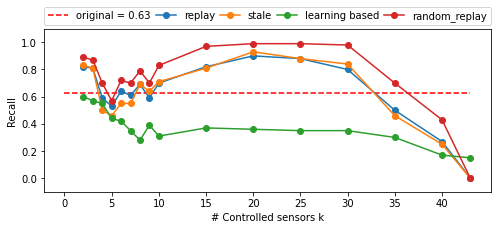

Original Recall: 0.6280487804878049
Recall After Constrained Variables Adversarial Attack on lstm model


,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,43
replay,0.79,0.79,0.52,0.49,0.59,0.53,0.62,0.51,0.6,0.76,0.86,0.82,0.77,0.5,0.27,0.0
stale,0.8,0.78,0.45,0.44,0.51,0.45,0.59,0.57,0.62,0.8,0.9,0.84,0.82,0.47,0.25,0.0
learning based,0.39,0.34,0.26,0.24,0.22,0.19,0.14,0.24,0.15,0.25,0.26,0.26,0.26,0.28,0.14,0.12
random_replay,0.83,0.83,0.57,0.53,0.68,0.6,0.73,0.67,0.77,0.96,0.99,0.99,0.98,0.8,0.62,0.37


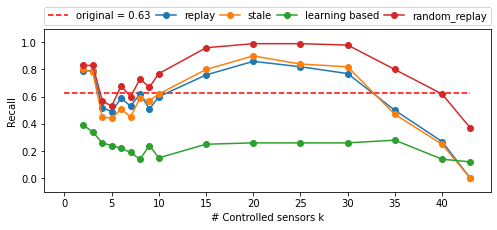

Original Recall: 0.703760162601626
Recall After Constrained Variables Adversarial Attack on cnn model


,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,43
replay,0.86,0.87,0.7,0.68,0.81,0.79,0.84,0.78,0.85,0.9,0.93,0.9,0.8,0.5,0.27,0.0
stale,0.85,0.86,0.62,0.61,0.76,0.72,0.81,0.81,0.84,0.9,0.95,0.89,0.86,0.47,0.29,0.0
learning based,0.59,0.57,0.55,0.55,0.52,0.44,0.37,0.4,0.3,0.36,0.36,0.36,0.36,0.34,0.21,0.19
random_replay,0.93,0.93,0.8,0.73,0.91,0.87,0.93,0.88,0.97,1.0,1.0,1.0,0.98,0.71,0.43,0.0


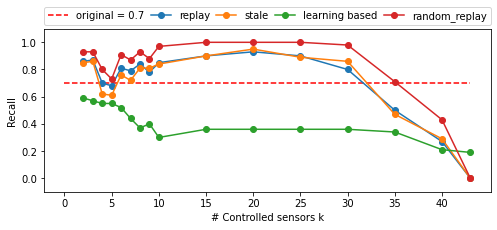

In [8]:
from IPython.display import display
for results_orig, results_replay, results_stale, results_random_replay, results_acsac, name in [(results_uncostrained_FC, results_replay_FC, results_stale_FC, results_random_replay_FC,results_acsac_FC, 'fc'),
                                                                                                   (results_uncostrained_LSTM, results_replay_LSTM, results_stale_LSTM,
                                                                                                    results_random_replay_LSTM,results_acsac_LSTM, 'lstm'),
                                                                                                   (results_uncostrained_CNN, results_replay_CNN, results_stale_CNN, results_random_replay_CNN,results_acsac_CNN, 'cnn')]:

    results_attack = pd.DataFrame(
        columns=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,43])
    for j in [43, 40, 35, 30, 25, 20, 15, 10, 9, 8, 7, 6, 5, 4, 3, 2]:
        results_attack.loc['replay', j] = round(results_replay[j], 2)
        results_attack.loc['stale', j] = round(results_stale[j], 2)
        results_attack.loc['learning based', j] = round(
            results_acsac[j], 2)
        results_attack.loc['random_replay', j] = round(
            results_random_replay[j], 2)
    print("Original Recall: "+str(results_orig.recall.values[0]))
    print("Recall After Constrained Variables Adversarial Attack on {} model".format(name))
    display(results_attack)  # table 7 appendix

    fig, ax = plt.subplots(figsize=(8, 3))
    ax.hlines(y=round(
        results_orig.recall.values[0], 2), xmin=0, xmax=43, color='r', linestyles='--',)
    ax.plot(results_attack.transpose(), 'o-')
    plt.legend(np.append('original = '+str(round(results_orig.recall.values[0], 2)),results_attack.transpose().columns.values), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
               ncol=5, mode="expand", borderaxespad=0.)
    plt.xticks(np.arange(0, 43, 5.0))
    plt.ylim(-0.1, 1.1)
    plt.xlabel('# Controlled sensors k')
    plt.ylabel('Recall')
    plt.savefig('plot_recall_BATADAL'+name+'.pdf', bbox_inches="tight")
    plt.show()
